In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
##Reading SAS Data

df = pd.read_sas('C:/Users/jelee/MIS/organics.sas7bdat', format = 'sas7bdat', encoding = 'latin-1')
df.tail()

,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
22218,0052834058,13.0,65.0,09,B,F,South East,London,Silver,1500.00,5.0,0.0,0.0
22219,0052834376,15.0,73.0,34,D,U,South East,S & S East,Gold,6053.06,12.0,0.0,0.0
22220,0052837057,9.0,70.0,15,B,F,North,Yorkshire,Gold,6000.00,5.0,0.0,0.0
22221,0052838096,11.0,66.0,08,B,F,North,N West,Silver,5000.00,5.0,0.0,0.0
22222,0052856469,3.0,75.0,53,F,NaN,South West,S West,Gold,6000.00,2.0,0.0,0.0


In [9]:
#OUtcome varible

df.TargetAmt.value_counts()

0.0    16718
1.0     4625
2.0      715
3.0      165
Name: TargetAmt, dtype: int64

In [10]:
#OUtcome varible

df.TargetBuy.value_counts()

0.0    16718
1.0     5505
Name: TargetBuy, dtype: int64

In [38]:
#Checking the missing
df.isnull().sum()

ID                 0
DemAffl            0
DemAge             0
DemCluster         0
DemClusterGroup    0
DemGender          0
DemReg             0
DemTVReg           0
PromClass          0
PromSpend          0
PromTime           0
TargetBuy          0
TargetAmt          0
dtype: int64

In [3]:
#Impute valies in missing


afmean=df.DemAffl.mean()
df.DemAffl.fillna(value=afmean, inplace=True)

agmean=df.DemAge.mean()
df.DemAge.fillna(value=agmean, inplace=True)


df.DemClusterGroup.fillna(value='U', inplace=True)


df.DemGender.fillna(value='U', inplace=True)

df.DemReg.fillna(value='U', inplace=True)
df.DemTVReg.fillna(value='U', inplace=True)

ptmean=df.PromTime.mean()
df.PromTime.fillna(value=ptmean, inplace=True)


In [4]:
#Create Dummies for  Multiple categorical columns

features =[ 'DemClusterGroup', 'DemGender',
       'DemReg', 'DemTVReg', 'PromClass']


df=pd.get_dummies(df, columns=features)

df.head()

,ID,DemAffl,DemAge,DemCluster,PromSpend,PromTime,TargetBuy,TargetAmt,DemClusterGroup_A,DemClusterGroup_B,...,DemTVReg_S & S East,DemTVReg_S West,DemTVReg_U,DemTVReg_Ulster,DemTVReg_Wales & West,DemTVReg_Yorkshire,PromClass_Gold,PromClass_Platinum,PromClass_Silver,PromClass_Tin
0,0000000140,10.0,76.0,16,16000.00,4.0,0.0,0.0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,0000000620,4.0,49.0,35,6000.00,5.0,0.0,0.0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0000000868,5.0,70.0,27,0.02,8.0,1.0,1.0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0000001120,10.0,65.0,51,0.01,7.0,1.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0000002313,11.0,68.0,04,0.01,8.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
#Define X and label

feat =['DemAffl', 'DemAge', 'PromSpend', 'PromTime',
        'DemClusterGroup_A', 'DemClusterGroup_B',
       'DemClusterGroup_C', 'DemClusterGroup_D', 'DemClusterGroup_E',
       'DemClusterGroup_F', 'DemClusterGroup_U', 'DemGender_F', 'DemGender_M',
       'DemGender_U', 'DemReg_Midlands', 'DemReg_North', 'DemReg_Scottish',
       'DemReg_South East', 'DemReg_South West', 'DemTVReg_Border',
       'DemTVReg_C Scotland', 'DemTVReg_East', 'DemTVReg_London',
       'DemTVReg_Midlands', 'DemTVReg_N East', 'DemTVReg_N Scot',
       'DemTVReg_N West', 'DemTVReg_S & S East', 'DemTVReg_S West',
       'DemTVReg_Wales & West', 'DemTVReg_Yorkshire', 'PromClass_Gold',
       'PromClass_Platinum', 'PromClass_Silver', 'PromClass_Tin']
X= df[feat]

y=df.TargetBuy


In [6]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1) # 70% training and 50% test

# Decision Tree

In [17]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [18]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8104751619870411


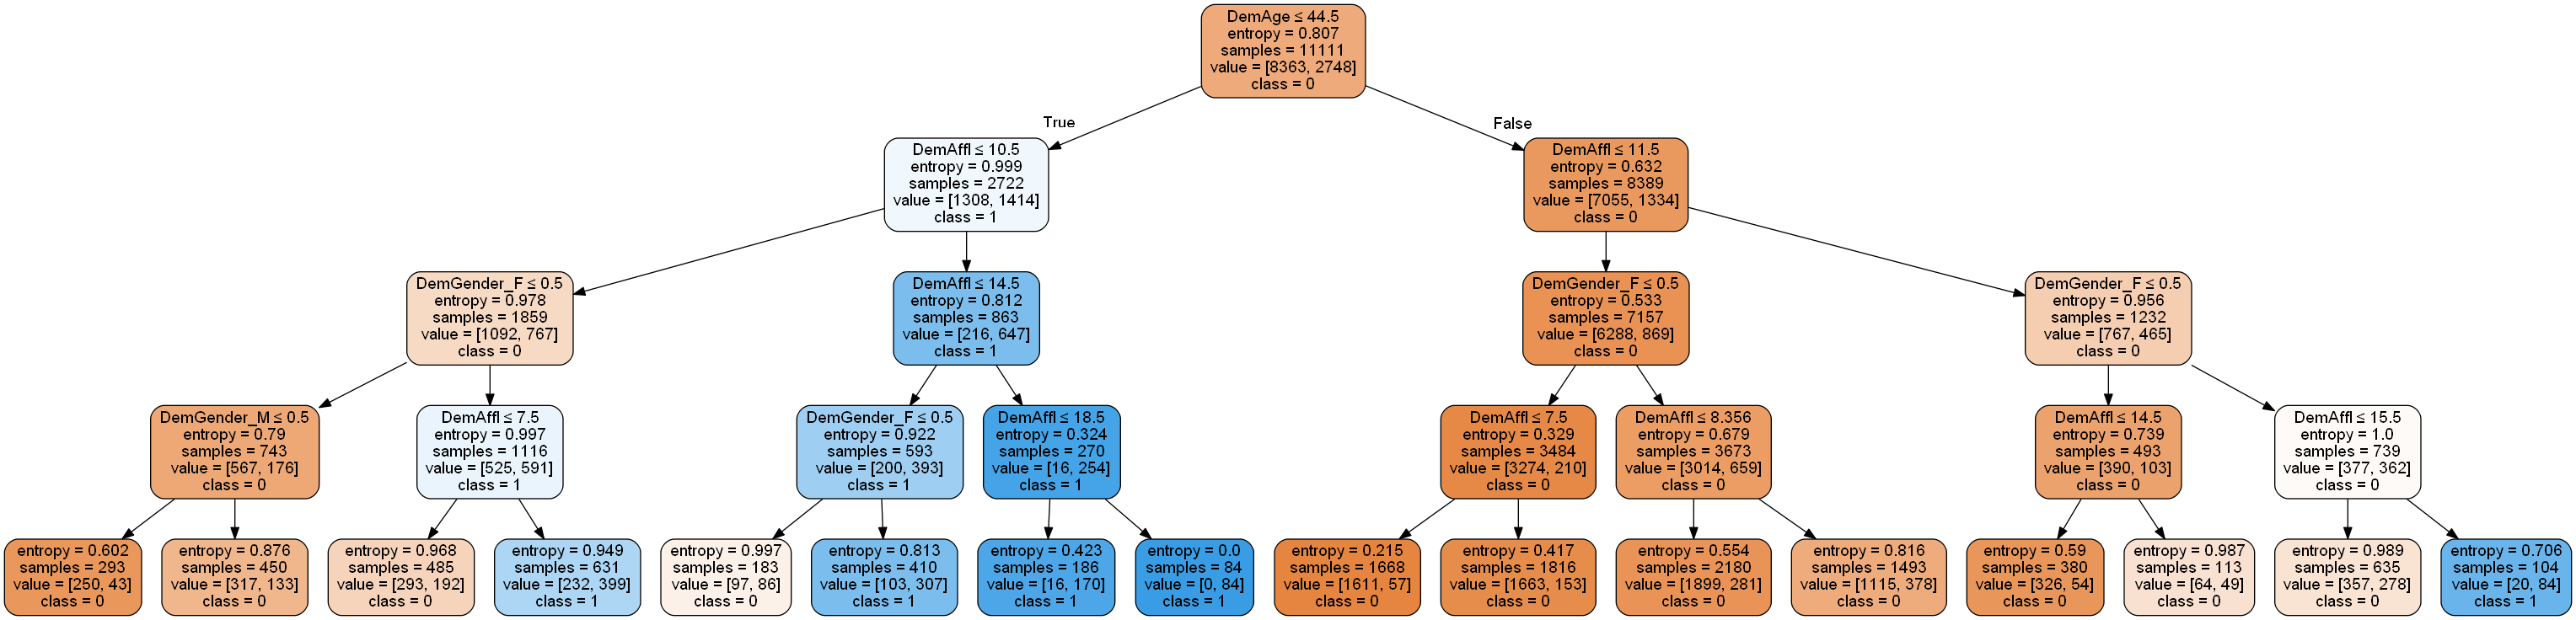

In [19]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feat,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

# Random Forest

In [21]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [22]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8015658747300216
